2025-07-04 13:12:26 INFO     xscen.config    Updated the config with ../paths_obs.yml.
2025-07-04 13:12:26 INFO     xscen.config    Updated the config with ../config_obs.yml.


Processing variable: tg_mean_seasonal_rmse

--> The keys in the returned dictionary of datasets are constructed as follows:
	'id.domain.processing_level.xrfreq'


/exec/abuyalo/.conda/envs/obsflow/lib/python3.12/site-packages/figanos/matplotlib/utils.py:227: UserWarning: Attribute "description" not found.
/exec/abuyalo/.conda/envs/obsflow/lib/python3.12/site-packages/figanos/matplotlib/utils.py:227: UserWarning: Attribute "description" not found.
/exec/abuyalo/.conda/envs/obsflow/lib/python3.12/site-packages/figanos/matplotlib/utils.py:227: UserWarning: Attribute "description" not found.
/exec/abuyalo/.conda/envs/obsflow/lib/python3.12/site-packages/figanos/matplotlib/utils.py:227: UserWarning: Attribute "description" not found.
/exec/abuyalo/.conda/envs/obsflow/lib/python3.12/site-packages/figanos/matplotlib/utils.py:227: UserWarning: Attribute "description" not found.
/exec/abuyalo/.conda/envs/obsflow/lib/python3.12/site-packages/figanos/matplotlib/utils.py:227: UserWarning: Attribute "description" not found.
/exec/abuyalo/.conda/envs/obsflow/lib/python3.12/site-packages/figanos/matplotlib/utils.py:227: UserWarning: Attribute "description" not

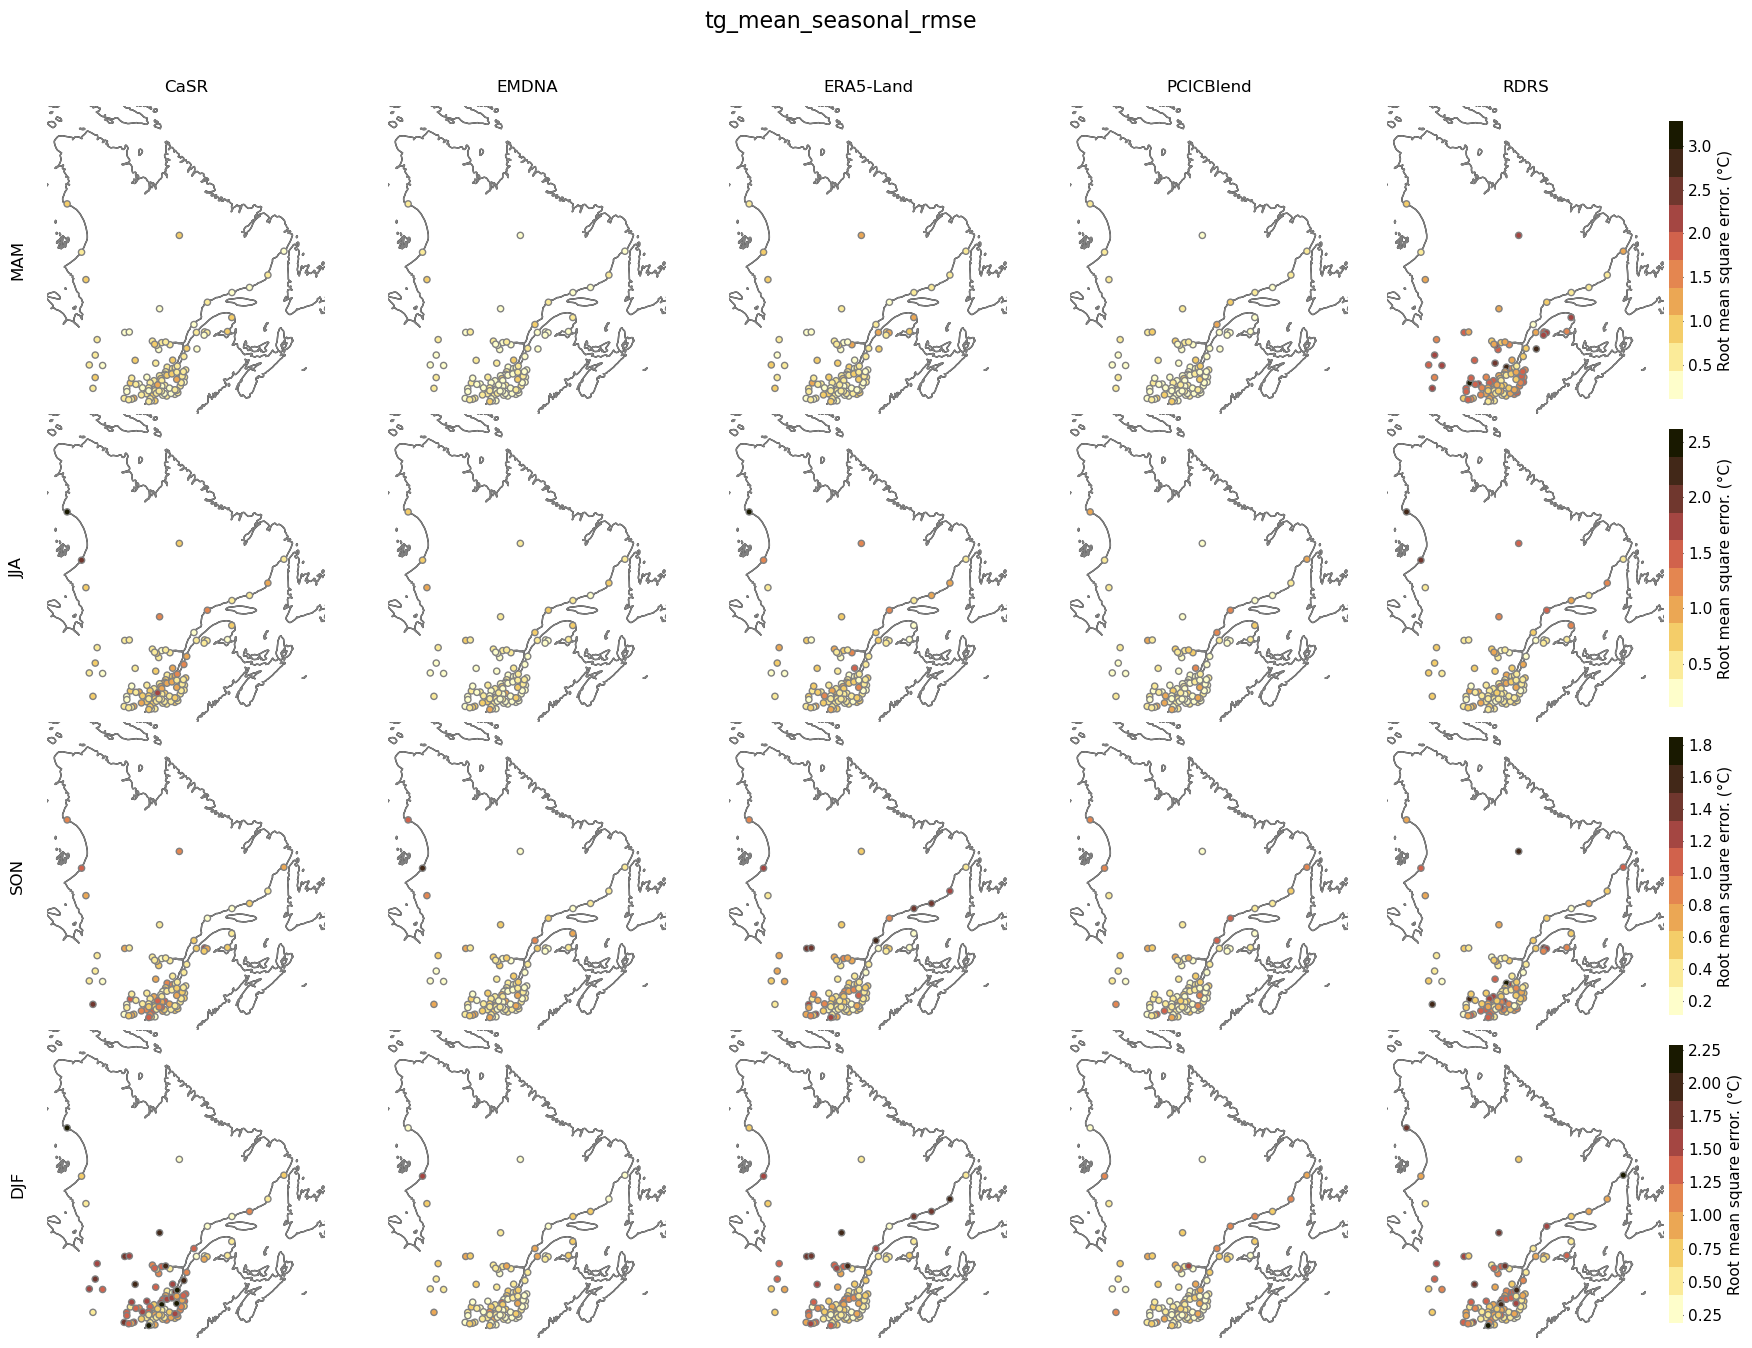

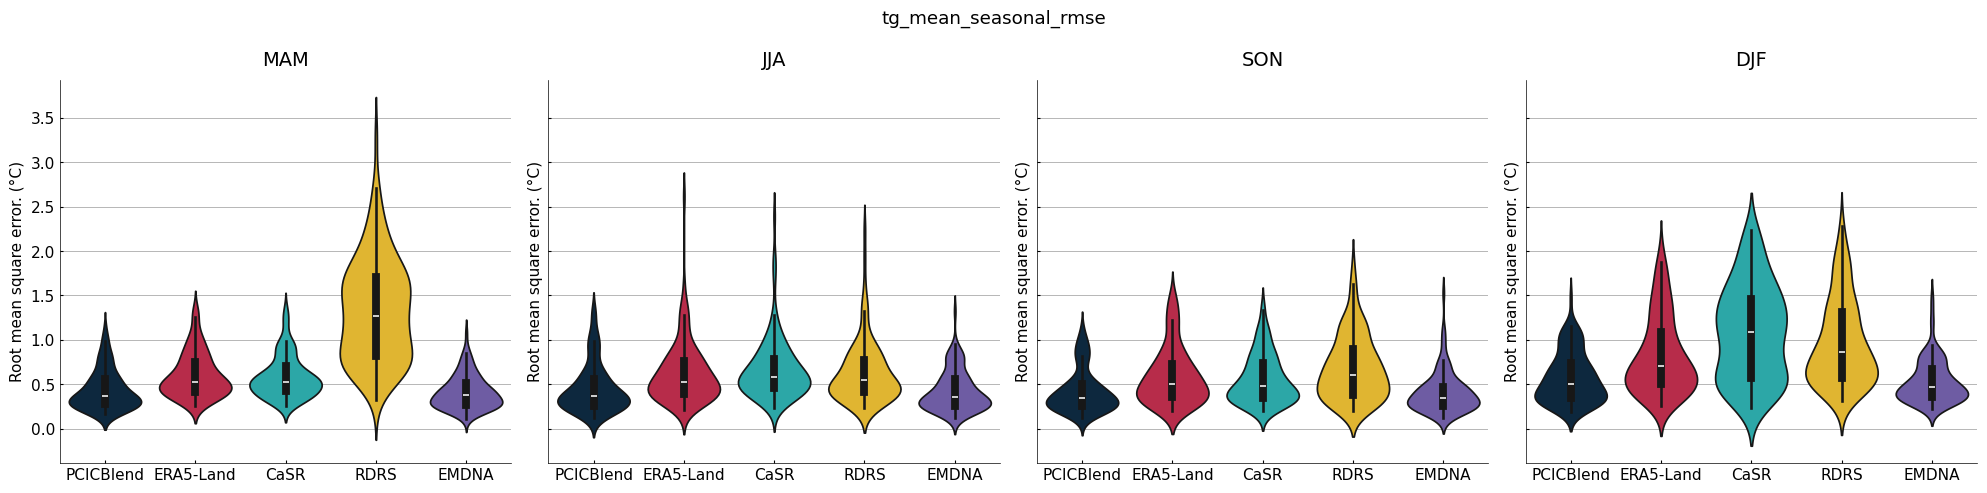

Processing variable: tg_mean_annual_rmse

--> The keys in the returned dictionary of datasets are constructed as follows:
	'id.domain.processing_level.xrfreq'


/exec/abuyalo/.conda/envs/obsflow/lib/python3.12/site-packages/figanos/matplotlib/utils.py:227: UserWarning: Attribute "description" not found.
/exec/abuyalo/.conda/envs/obsflow/lib/python3.12/site-packages/figanos/matplotlib/utils.py:227: UserWarning: Attribute "description" not found.
/exec/abuyalo/.conda/envs/obsflow/lib/python3.12/site-packages/figanos/matplotlib/utils.py:227: UserWarning: Attribute "description" not found.
/exec/abuyalo/.conda/envs/obsflow/lib/python3.12/site-packages/figanos/matplotlib/utils.py:227: UserWarning: Attribute "description" not found.
/exec/abuyalo/.conda/envs/obsflow/lib/python3.12/site-packages/figanos/matplotlib/utils.py:227: UserWarning: Attribute "description" not found.


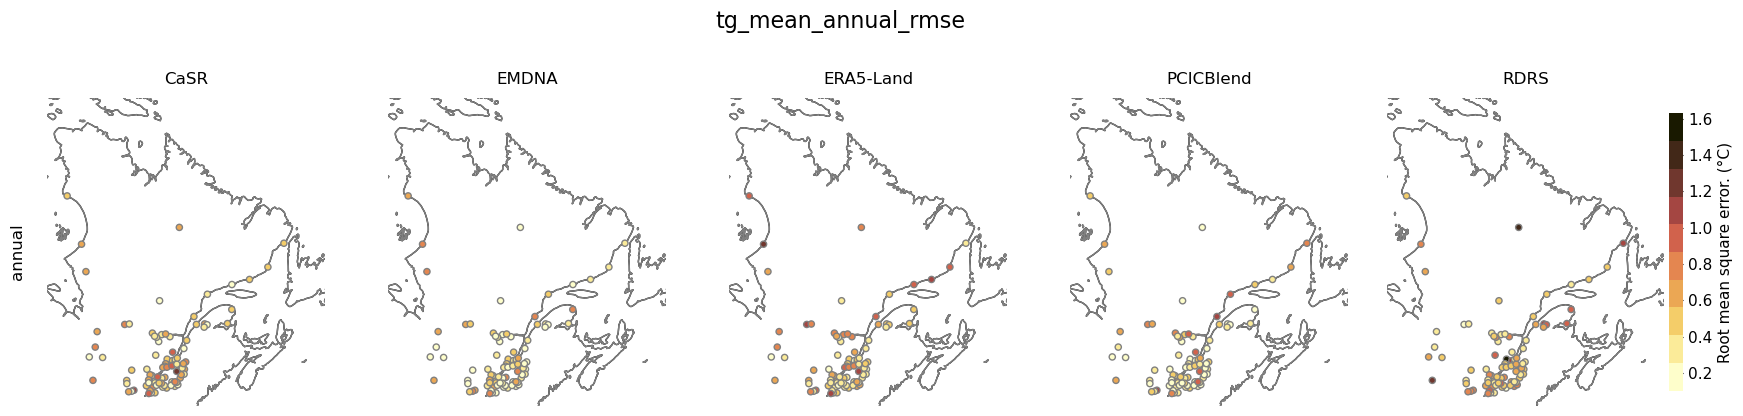

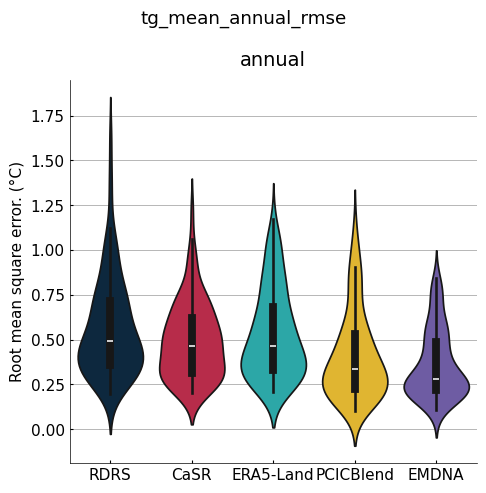

Processing variable: pr_mean_annual_rmse

--> The keys in the returned dictionary of datasets are constructed as follows:
	'id.domain.processing_level.xrfreq'


/exec/abuyalo/.conda/envs/obsflow/lib/python3.12/site-packages/figanos/matplotlib/utils.py:227: UserWarning: Attribute "description" not found.
/exec/abuyalo/.conda/envs/obsflow/lib/python3.12/site-packages/figanos/matplotlib/utils.py:227: UserWarning: Attribute "description" not found.
/exec/abuyalo/.conda/envs/obsflow/lib/python3.12/site-packages/figanos/matplotlib/utils.py:227: UserWarning: Attribute "description" not found.
/exec/abuyalo/.conda/envs/obsflow/lib/python3.12/site-packages/figanos/matplotlib/utils.py:227: UserWarning: Attribute "description" not found.
/exec/abuyalo/.conda/envs/obsflow/lib/python3.12/site-packages/figanos/matplotlib/utils.py:227: UserWarning: Attribute "description" not found.


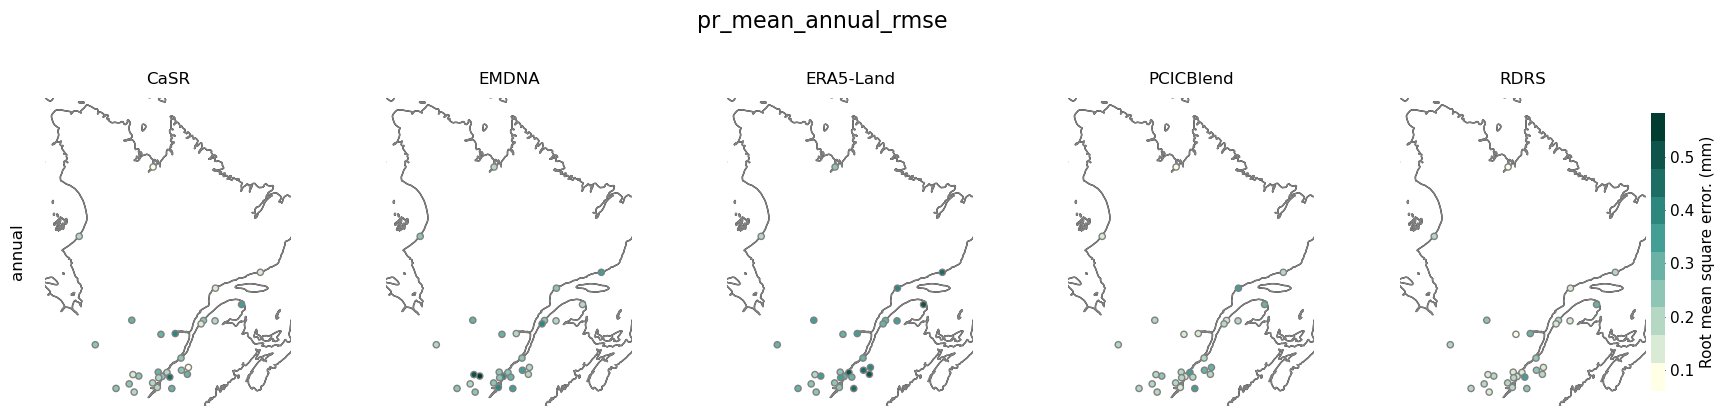

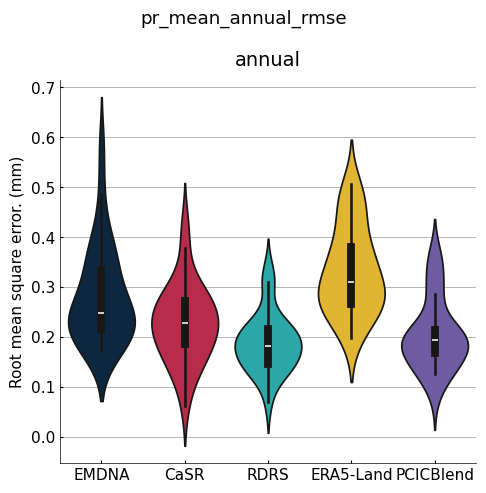

Processing variable: pr_mean_seasonal_rmse

--> The keys in the returned dictionary of datasets are constructed as follows:
	'id.domain.processing_level.xrfreq'


/exec/abuyalo/.conda/envs/obsflow/lib/python3.12/site-packages/figanos/matplotlib/utils.py:227: UserWarning: Attribute "description" not found.
/exec/abuyalo/.conda/envs/obsflow/lib/python3.12/site-packages/figanos/matplotlib/utils.py:227: UserWarning: Attribute "description" not found.
/exec/abuyalo/.conda/envs/obsflow/lib/python3.12/site-packages/figanos/matplotlib/utils.py:227: UserWarning: Attribute "description" not found.
/exec/abuyalo/.conda/envs/obsflow/lib/python3.12/site-packages/figanos/matplotlib/utils.py:227: UserWarning: Attribute "description" not found.
/exec/abuyalo/.conda/envs/obsflow/lib/python3.12/site-packages/figanos/matplotlib/utils.py:227: UserWarning: Attribute "description" not found.
/exec/abuyalo/.conda/envs/obsflow/lib/python3.12/site-packages/figanos/matplotlib/utils.py:227: UserWarning: Attribute "description" not found.
/exec/abuyalo/.conda/envs/obsflow/lib/python3.12/site-packages/figanos/matplotlib/utils.py:227: UserWarning: Attribute "description" not

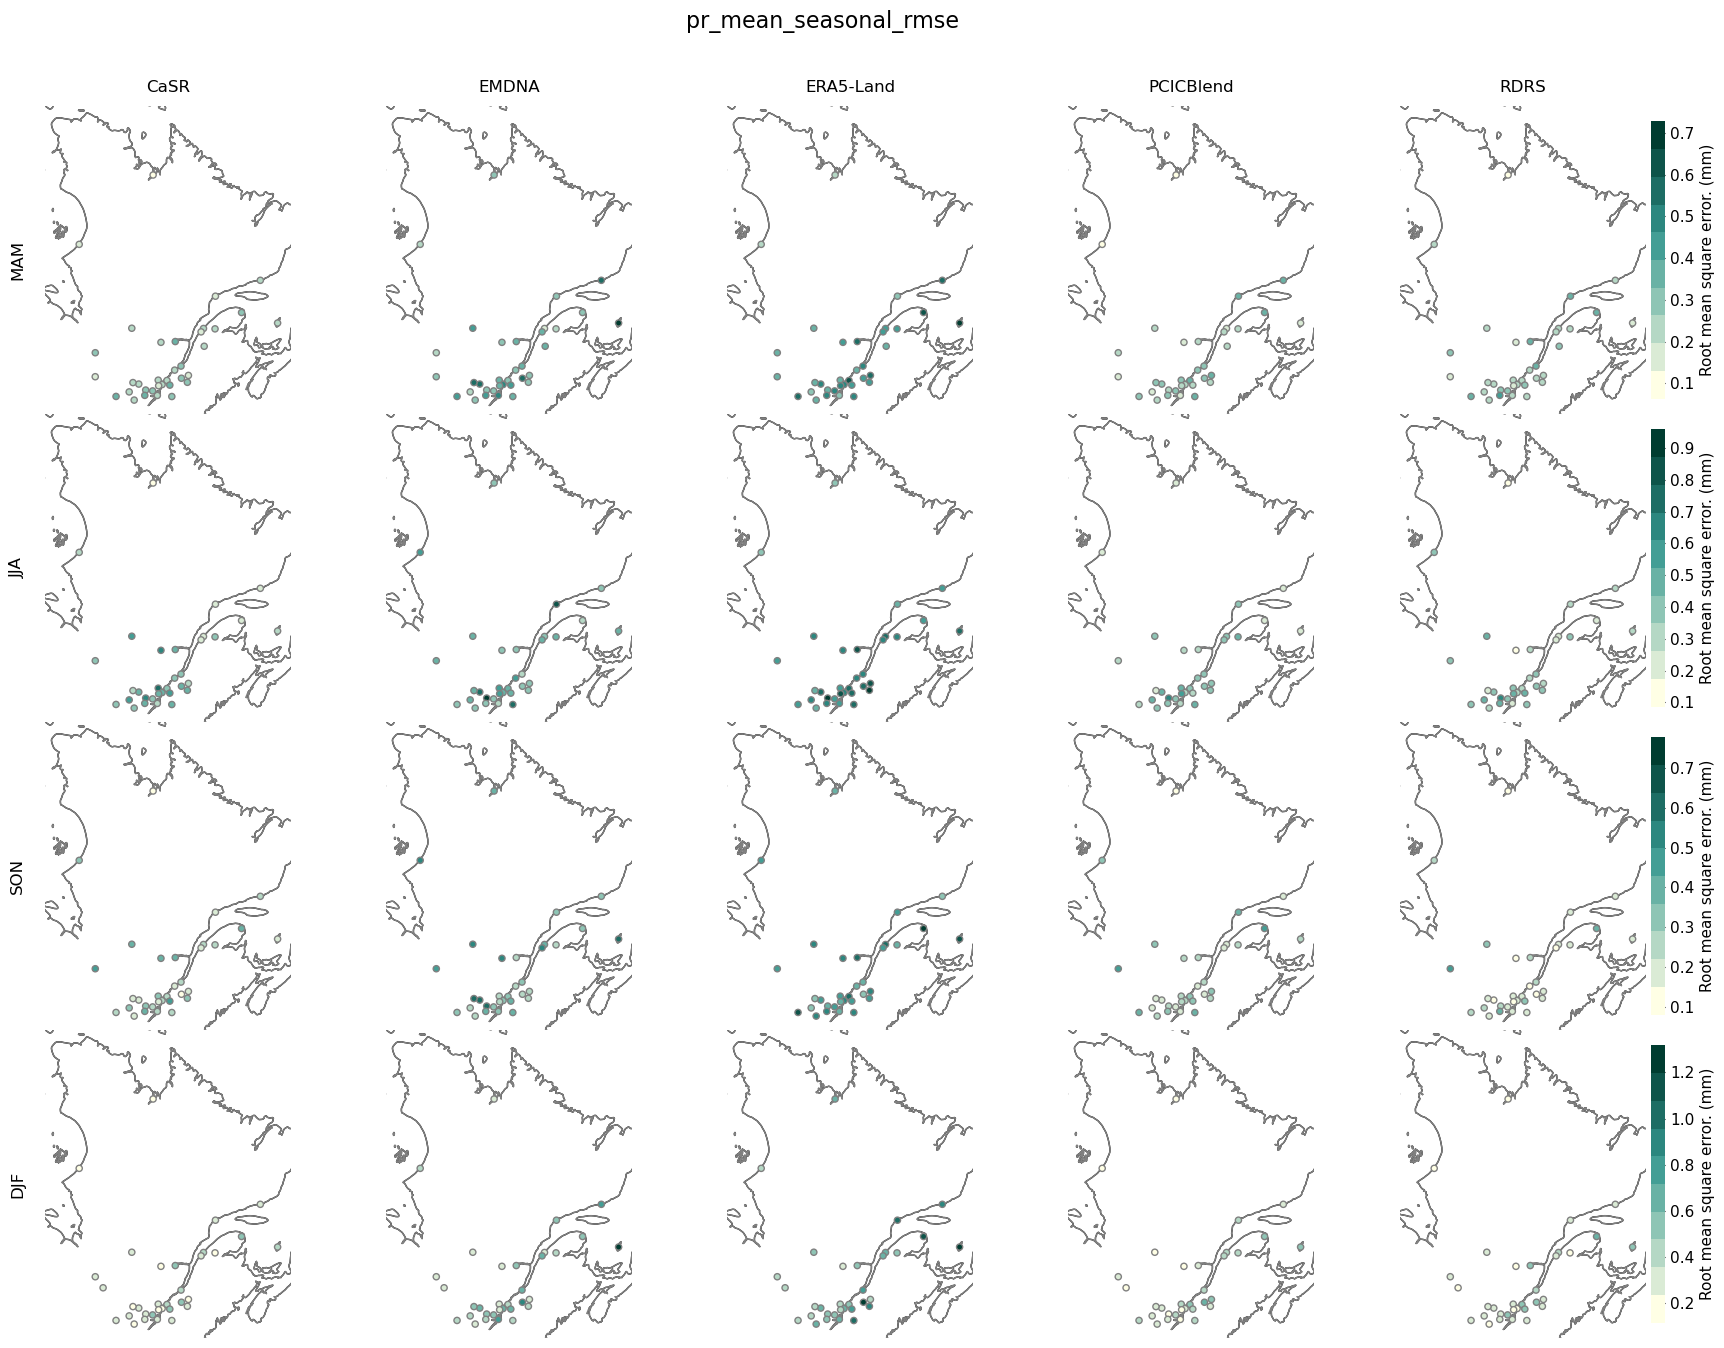

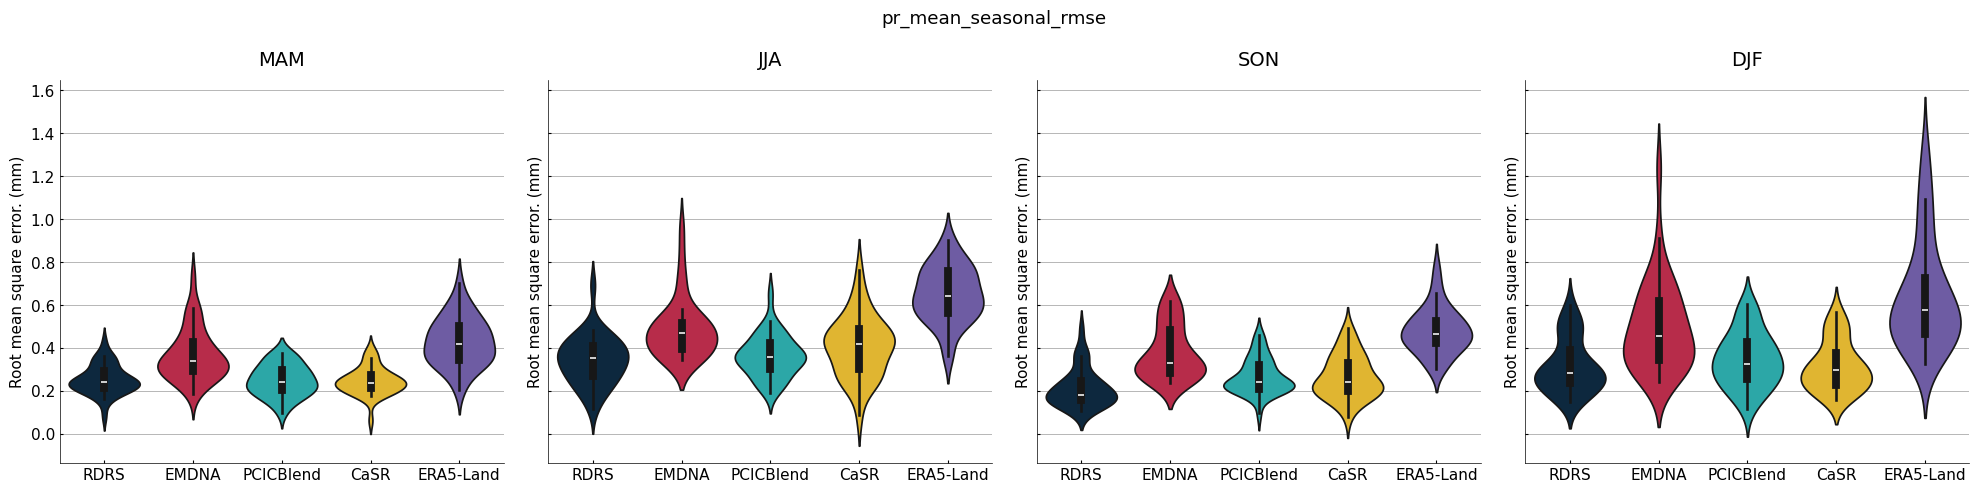

In [3]:
import sys

import numpy as np
import xscen as xs
import cartopy.crs as ccrs
from xscen.config import CONFIG
import figanos.matplotlib as fg

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from figanos.matplotlib.utils import create_cmap

fg.utils.set_mpl_style('ouranos')

# Load configuration
xs.load_config(
    "../paths_obs.yml", "../config_obs.yml", verbose=(__name__ == "__main__"), reset=True
)

pcat = xs.ProjectCatalog(CONFIG["paths"]["project_catalog"])
pcat_df = pcat.df

# === MAIN LOOP ===
pcat_df_perf = pcat_df[pcat_df["processing_level"] == "performance"]
variable_groups = pcat_df_perf["variable"].unique()
variables = set(item for group in variable_groups for item in group)

cmap = create_cmap("prec")

for perf_var in variables:
    print(f"Processing variable: {perf_var}")

    dts_perf = pcat.search(processing_level="performance", variable=perf_var).to_dataset_dict()

    all_rec_ids = sorted(dts_perf.keys())
    n_models = len(all_rec_ids)

    # Determine if data is annual (no "season" dimension) and add fake season if needed
    for rec_id in all_rec_ids:
        ds = dts_perf[rec_id]
        if perf_var in ds:
            if "season" not in ds[perf_var].dims:
                print(f"\tDetected annual data for {rec_id}")
                dts_perf[rec_id][perf_var] = ds[perf_var].expand_dims(season=["Annual"])

    # Extract seasons from one dataset
    first_ds = dts_perf[all_rec_ids[0]]
    seasons = first_ds["season"].values
    n_seasons = len(seasons)

    import matplotlib.gridspec as gridspec

    fig = plt.figure(
        figsize=(4.2 * n_models + 1.0, 4.0 * n_seasons),
        constrained_layout=False
    )

    gs = gridspec.GridSpec(
        nrows=n_seasons,
        ncols=n_models,
        figure=fig,
        wspace=0.0,
        hspace=0.0
    )

    axs = np.empty((n_seasons, n_models), dtype=object)
    for i in range(n_seasons):
        for j in range(n_models):
            axs[i, j] = fig.add_subplot(gs[i, j], projection=ccrs.LambertConformal())

    for i, season in enumerate(seasons):
        # Compute vmin/vmax across all reconstructions for this season
        vmin = min(
            dts_perf[rid][perf_var].sel(season=season).min().values.item()
            for rid in all_rec_ids
        )
        vmax = max(
            dts_perf[rid][perf_var].sel(season=season).max().values.item()
            for rid in all_rec_ids
        )
        norm = mcolors.Normalize(vmin=vmin, vmax=vmax)
        levels = np.linspace(vmin, vmax, 11)

        for j, rec_id in enumerate(all_rec_ids):
            ax = axs[i, j]
            ax.coastlines()

            # Determine extent
            lat_vals = dts_perf[rec_id].lat.values
            lon_vals = dts_perf[rec_id].lon.values
            extent = [lon_vals.min(), lon_vals.max(), lat_vals.min(), lat_vals.max()]
            ax.set_extent(extent, crs=ccrs.PlateCarree())

            is_final_column = (j == n_models - 1)

            da = dts_perf[rec_id][perf_var].sel(season=season)
            
            nan_mask = np.isnan(da).compute()
            da = da.where(~nan_mask, drop=True)

            fg.scattermap(
                da,#da.dropna(dim="station"),
                ax=ax,
                plot_kw={
                    "norm": norm,
                    "add_colorbar": is_final_column,
                    "cbar_kwargs": {"shrink": 0.9},
                    "zorder": 3,
                    "edgecolor": "grey",
                    "s": 20,
                    "linewidth": 0.1,
                },
                levels=levels,
                show_time=False,
                features={"coastline": {"edgecolor": "gray"}},
                frame=False
            )

            # Titles and annotations
            if i == 0:
                src = dts_perf[rec_id].attrs.get("cat:source", "")
                ax.set_title(f"{src}", fontsize=12)
            else:
                ax.set_title("")

            if j == 0:
                ax.annotate(
                    str(season),
                    xy=(-0.08, 0.5),
                    xycoords='axes fraction',
                    ha='right',
                    va='center',
                    fontsize=12,
                    rotation=90
                )

    # Adjust suptitle position dynamically
    suptitle_y = 0.94 if n_seasons > 1 else 1.1
    fig.suptitle(f"{perf_var}", fontsize=16, y=suptitle_y)

    ###### Violin plots ######
    import matplotlib.pyplot as plt

    # === Extract seasons from any dataset ===
    any_ds = next(iter(dts_perf.values()))
    seasons = any_ds.season.values
    n_seasons = len(seasons)

    # === Create a subplot with one column per season ===
    fig, axs = plt.subplots(1, n_seasons, figsize=(5 * n_seasons, 5), sharey=True)

    # Ensure axs is iterable
    if n_seasons == 1:
        axs = [axs]

    # === Loop over seasons ===
    for i, season in enumerate(seasons):
        violin_dict = {}
        for id in dts_perf.keys():
            ds = dts_perf[id]
            new_key = ds.attrs.get("cat:source", id)

            for var in ds.data_vars:
                da = ds[var].sel(season=season)
                violin_dict[new_key] = da

        # === Plot violin plot in the corresponding column ===
        fg.violin(violin_dict, ax=axs[i])  # Pass ax to plot in the right place
        axs[i].set_title(str(season))

    fig.suptitle(var)
    plt.tight_layout()
    plt.show()

    ################################################



In [4]:
import xarray as xr

def combine_datasets(dts_dict, new_dim):
    # Convert each dataset into a DataArray and add a new dimension
    expanded = []
    keys = []
    for key, ds in dts_dict.items():
        expanded.append(ds.expand_dims({new_dim: [key]}))
        keys.append(key)

    # Concatenate along the new dimension
    combined = xr.concat(expanded, dim=new_dim)

    return combined

import pandas as pd

rows = []
row_labels = []

for k in dts_perf.keys():
    da = dts_perf[k][perf_var].sel(season=season)
    rows.append(da.values.flatten())  # 1D array over stations
    row_labels.append(k)

# Get the station labels from one dataset
station_labels = dts_perf[next(iter(dts_perf))]["station"].values

# Create the DataFrame
df = pd.DataFrame(rows, index=row_labels, columns=station_labels)
df = df.dropna(axis=1, how='all')
df = df.loc[:, df.isna().any()]
# View the table
df

""
RDRS_Quebec_GovCan_AHCCD_CAN_station-pr.Quebec.performance.fx
EMDNA_Quebec_GovCan_AHCCD_CAN_station-pr.Quebec.performance.fx
PCICBlend_Quebec_GovCan_AHCCD_CAN_station-pr.Quebec.performance.fx
CaSR_Quebec_GovCan_AHCCD_CAN_station-pr.Quebec.performance.fx
ERA5-Land_Quebec_GovCan_AHCCD_CAN_station-pr.Quebec.performance.fx
